In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor 
#bib Stochastic Gradient Descent Regressor 
# qui contient le calcul de la fonction coût, des gradients, de l'algo de minimisation...

In [2]:
np.random.seed(0) #graine pour semer l'aléatoire mais avec notre choix

In [3]:
x,y=make_regression(n_samples=100,n_features=1,noise=10)
# n_samples : nombre d'échantillons à générer
# n_features : nombre de variables
# noise : le bruit qu'on occasionne pour éviter un nuage plat

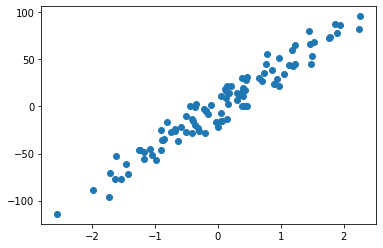

In [4]:
plt.scatter(x,y)

In [5]:
import seaborn as sns 
# une autre bib graphique splendide

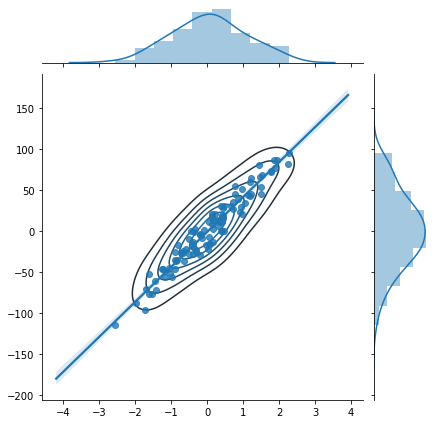

In [6]:
sns.jointplot(x[:,0],y,kind='reg').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

In [7]:
x.mean()

0.059808015534484976

In [8]:
y.mean()

1.7348017219062482

In [9]:
model=SGDRegressor(max_iter=100,eta0=0.0001)
# max_iter est le nombre maximum d'itération dans la descente de gradient
# eta0 est le learning rate càd le pas pour passer d'une étape à l'autre dans la descente de gradient

In [10]:
model.fit(x,y)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [11]:
model.score(x,y)

0.22279377204565387

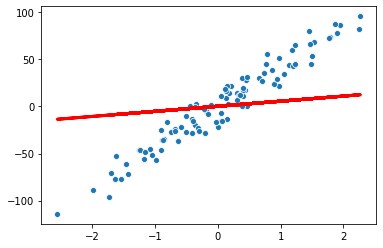

In [12]:
sns.scatterplot(x[:,0],y)
plt.plot(x[:,0],model.predict(x),c='red',lw=3) 
#on le constate, très mauvais modèle !

In [13]:
model=SGDRegressor(max_iter=1000,eta0=0.001)  #on change les hyperparam

In [14]:
model.fit(x,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
model.score(x,y)

0.9416557905990657

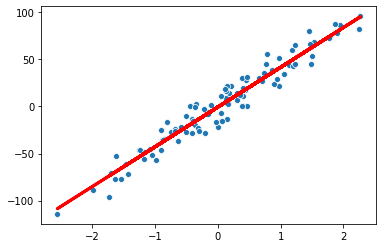

In [16]:
sns.scatterplot(x[:,0],y)
plt.plot(x[:,0],model.predict(x),c='red',lw=3) 
#beaucoup mieux non !

In [17]:
from sklearn.model_selection import cross_val_score,GridSearchCV #en option pour faire du grid search

In [18]:
hyperparam={'eta0':[1,0.1,0.01,0.001,0.0001],
           'max_iter':[100,500,1000],
            'alpha':[1,0.1,0.01,0.001,0.0001],
            'learning_rate':['invscaling'], 'loss':['squared_loss'],
            'average':[False], 'early_stopping':[False], 'epsilon':[0.1],
            'n_iter_no_change':[5], 'penalty':['l2'], 'power_t':[0.25], 'random_state':[None],
             'shuffle':[True], 'tol':[0.001], 'validation_fraction':[0.1], 'verbose':[0],
             'warm_start':[False]
           }

In [19]:
grille=GridSearchCV(SGDRegressor(),hyperparam,cv=3) #en augmentant la CV, on diminue le score

In [20]:
grille.fit(x,y)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaco

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaco

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, ver...
                         'eta0': [1, 0.1, 0.01, 0.001, 0.0001],
                         'learning_rate': ['invscaling'],
                         'loss': ['squared_loss'], 'max_iter': [100, 500, 1000],
                         'n_iter_no_change': [5], 'penalty': ['l2'],
                         'power_t': [0.25], 'random_st

In [21]:
grille.best_params_

{'alpha': 0.01,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 100,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
grille.best_score_

0.9337598445481595

# Les courbes d'apprentissage : elles permettent de montrer l'évolution de la fonction Coût au fil des itérations de l'algorithme de Gradient Descent. Si le modèle apprend, alors la fonction coût diminue avec le temps.

In [23]:
#definir la fonction modele
def model(X, theta):
    # x shape: (m, n)
    # theta shape: (n,1)
    return X.dot(theta) #shape: (m, 1)
#definir la fonction cout
def cost_function(X, y, theta):
    m = len(y)
    J = 1/(2*m) * np.sum((model(X, theta) - y)**2)
    return J
#definit la fonction gradient
def gradient(X, y, theta):
    return 1/m * X.T.dot((X.dot(theta) - y))

(100, 2)

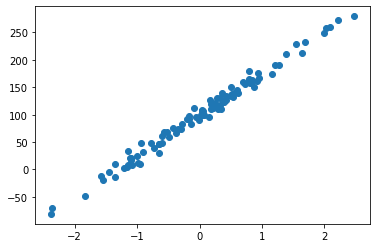

In [24]:
np.random.seed(4)
n=1
m = 100
x, y = make_regression(n_samples=m, n_features=n, noise=10)
y = y + 100
plt.scatter(x, y)
y = y.reshape(y.shape[0], 1)
#ajouter le Bias a X
X = np.hstack((np.ones(x.shape), x))
X.shape

In [25]:
#algorithme de Gradient Descent refait à la "main"
def gradient_descent(X, y, theta, learning_rate =0.001, iterations = 1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(0, iterations):
        prediction = model(X, theta)
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

In [26]:
# utilisation de l'algorithme
np.random.seed(0)
theta = np.random.randn(2, 1)
iterations = 10
learning_rate = 0.3
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate=learning_rate, iterations = iterations)

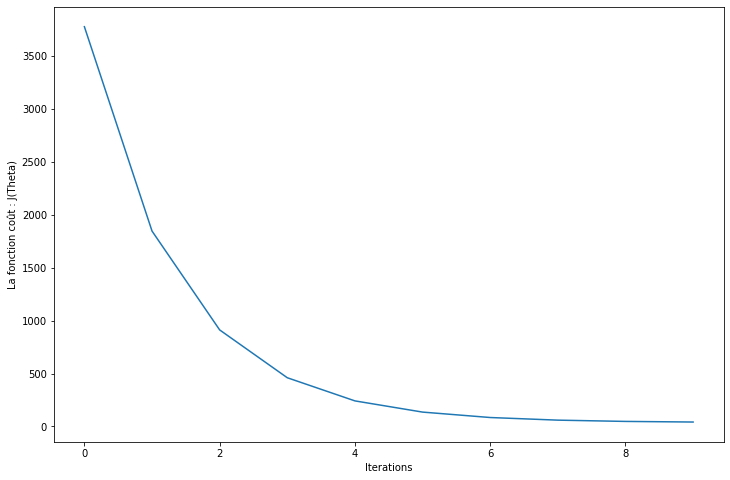

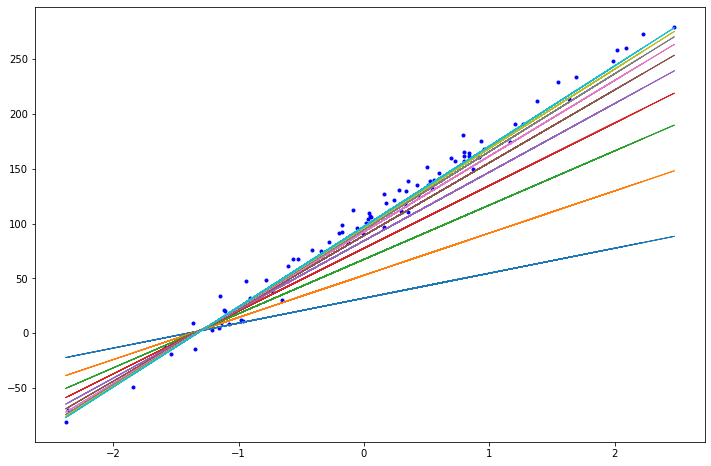

In [27]:
#visualisation des courbes d'apprentissage
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('La fonction coût : J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),cost_history)

# visualisation du modele au cours de son apprentissage
fig,ax = plt.subplots(figsize=(12,8))
_=ax.plot(x, y, 'b.')

for i in range(iterations):
    _=ax.plot(x, model(X, theta_history[i]), lw=1)

# Régression polynomiale

In [28]:
from sklearn.preprocessing import PolynomialFeatures
# permet de faire du future engineering en ajoutant des nouvelles variables 
#Generate a new feature matrix consisting of all polynomial combinations of the features 
# cwith degree less than or equal to the specified degree. For example, if an input sample 
# is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [29]:
np.random.seed(0)

In [30]:
#création du dataset
x,y=make_regression(n_samples=100,n_features=1,noise=10)
y=y**2

In [31]:
#on rajoute des variables polynomiales
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x=poly_features.fit_transform(x)

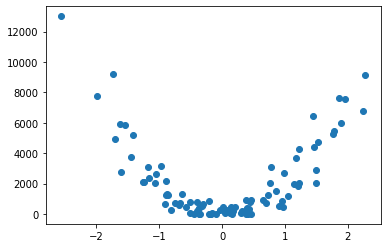

In [32]:
plt.scatter(x[:,0],y)

In [33]:
#on entraine le modèle de la même façon qu'avec la régression linéaire
model=SGDRegressor(max_iter=1000,eta0=0.001)

In [34]:
model.fit(x,y)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
model.score(x,y)

0.8940616961411476

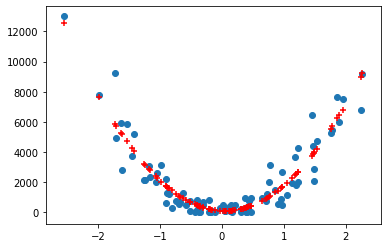

In [36]:
plt.scatter(x[:,0],y,marker='o')
plt.scatter(x[:,0],model.predict(x),c='red',marker='+')

In [37]:
#on peut aussi développer des modèles très complexes capable 
#de prédire des résultats avec des milliers de features

In [102]:
#création du dataset
x,y=make_regression(n_samples=1000,n_features=1,noise=50)

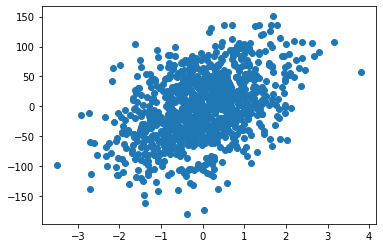

In [103]:
plt.scatter(x[:,0],y)

In [104]:
#on entraine le modèle de la même 
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=5,n_estimators=1000)

In [105]:
model.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
model.score(x,y)

0.9829466072046147

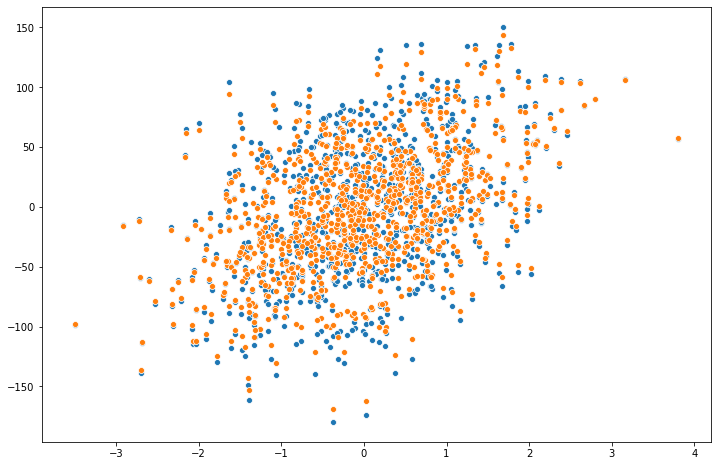

In [119]:
plt.figure(figsize=(12,8))
sns.scatterplot(x[:,0],y,marker='o')
sns.scatterplot(x[:,0],model.predict(x),marker='o')